# Polynomial Gradient Descent with Base Python

This is a simple polynomial gradient descent. It is a naive implmentation that is not optimized or vectorized. It is meant to be a simple demo on how gradient descent can be accomplished. To keep it simple, it uses base python. I don't intend for it to be used for anything important!

## Some Equations

The "target" polynomial that will be fitted is defined as Eqn. 1:

$$ y_i = \sum_{i=0}^{n} a_i x^i $$

The "estimate" polynomial that will be fitted is defined the same way but with a hat of the y Eqn. 2:

$$ \hat y_i = \sum_{i=0}^{n} a_i x^i $$

To fit the polynomial the code will minimize the residual sum of squares (RSS) function Eqn. 3:

$$ RSS = \sum_{i=0}^{n} (y_i - \hat y_i)^2 $$

Gradient desscent needs the partial derivative of the RSS with respect to each ceofficient, which is Eqn. 4:

$$ {\partial \over \partial a_k}  = -2 \sum_{i=1}^n \left(y_i-\hat y_i\right) x_i^{k} $$

To define each polynomial, I will gather the coefficients into a vector Eqn. 5:

$$ \mathbf a = [a_1, a_2, ..., a_i] $$

In [1]:
from math import sqrt
import matplotlib.pyplot as plt

## Custom Functions

The code in this example is built around functions, so I will define these functions in the first part of the notebook and use these functions in the second part of the notebook.

### Linspace Function

Since I am not using numpy, I am making my own linspace function. Later, this function will make the x-axis to evaluate the polynomials with.

In [2]:
def linspace(min_val, max_val, npoints):
    """
    Creates a list of floating point values between the minimum and
    maximum values, with the number of points (+1) to cover the entire
    span specified.
    
    Parameters
    ----------
    min_val
        The minimum value in the range as a float.
        
    max_val
        The maximum value in the range as a float.
        
    npoints
        The number of points in the range as a float.
        
    Returns
    -------
    list[float]
        A list of floating point values as specified.
    """
    
    return [min_val+(max_val-min_val)/npoints*i for i in range(npoints+1)]

### Polynomial Function

This will evaluate a list of y values from a polynomial according to Eqns 1 and 2 with an x-axis and vector of coefficients.

In [3]:
def polynomial(x_axis, coeffs):
    """
    Evaluates a polynomial along a given axis given coefficients.
    
    Parameters
    ----------
    x_axis:
         A list of floats that is the x-axis to supply as x_i.
         
    coeffs:
        The coefficients of the polynomial as defined in the vector
        in Eqn. 4.
        
    Returns
    -------
    list[float]
        Returns a list of floats that are the values of the polynomial.
    """
    
    ys = []
    for x in x_axis:
        y = 0.
        for i, coeff in enumerate(coeffs):
            y += coeff * x**i
        ys.append(y)
    return ys

### RSS Function

This function will calculate the error between the target and estimate polynomials according to Eqn. 3.

In [4]:
def rss(x_axis, y_coeffs, y_hat_coeffs):
    """
    Calculates the RSS as defined in Eqn 3 between the two polynomials 
    specified in Eqns 1 or 2.
    
    Parameters
    ----------
    x_axis
        The x-axis as a list of floats with which to compare the 
        polynomials.
        
    y_coeffs:
        The coefficients as a list of floats for the target polynomial.
        
    y_hat_coeffs
        The coefficients as a list of floats for the estimate polynomial.
        
    Returns
    -------
    float
        An RSS value between the target and estimate.
    """
    
    target_ys = polynomial(x_axis, y_coeffs)
    estimate_ys = polynomial(x_axis, y_hat_coeffs)
    return sum((target_y - estimate_y)**2 for target_y, estimate_y in zip(target_ys, estimate_ys))

### Gradient Function

This function calculates the components of the gradient of the RSS error between the target and estimate coefficients. It implements Eqn 4.

In [5]:
def gradient(x_axis, target_ys, estimate_ys, y_hat_coeffs):
    """
    Calculates the gradient of the error between the target and estimate
    polynomials and returns the components of the gradient in a list of
    floats.
    
    Parameters
    ----------
    x_axis
        The x axis as a list of floats.
    
    target_ys
        List of floats that is the target polynomial y values.
        
    estimate_ys
        List of floats that is the estimate polynomial y values.
        
    y_hat_coeffs
        The estimate coefficients as a list of floats.
        
    Returns
    -------
    list[float]
        The components of the gradient as a list of floats.
    """
    
    components = []
    for k, _ in enumerate(y_hat_coeffs):
        component = 0.
        for i, (target_y, estimate_y) in enumerate(zip(target_ys, estimate_ys)):
            component += (target_y - estimate_y) * x_axis[i] ** k
        components.append(-2 * component)
    return components

### Gradient Descent Function

This function uses the gradient to iteravely refine the estimate coefficients to move the estimate closer to the target. It returns the history of the RSS values along the way.

In [6]:
def gradient_descent(x_axis, target_ys, target_coeffs, y_hat_coeffs_initial, learn_rate=1e-6, max_iter=1000, rss_threshold=50.):
    """
    Performs gradient descent optimization to make the estimate coefficients
    converge to values that give a polynomial function with a shape similar
    to the target values.
    
    Training continues until max iterations are reached or the RSS diminishes
    below the given threshold.
    
    Parameters
    ----------
    x_axis
        List of floats that is the x-axis for the polynomials.
        
    target_ys
        List of floats that is the target polynomial.
        
    y_hat_coeffs_initial
        The initial guess for the estimate coefficients
        
    learn_rate
        The rate at which to descend the gradient during fitting. Higher numbers
        descend quicker but may not find the true minimum.
        
    max_iter
        Integer of the maximum number of iterations the algorithm will attempt.
        Used to prevent infinite loops.
        
    rss_threshold
        If RSS diminishes below this threshold, training iterations will stop.
        
    Returns
    -------
    list[dict]
        A list of dictionaries containing the training history at each iteration.
    """
    
    fit_history = []
    y_hat_coeffs = y_hat_coeffs_initial[:]
    for i in range(max_iter):
        estimate_ys = polynomial(x_axis, y_hat_coeffs)
        estimate_rss = rss(x_axis, target_coeffs, y_hat_coeffs)
        fit_history.append({
            'rss': estimate_rss,
            'y_hat_coeffs': y_hat_coeffs[:]
        })
        if estimate_rss < rss_threshold:
            break
        current_gradient = gradient(x_axis, target_ys, estimate_ys, y_hat_coeffs)
        y_hat_coeffs = [y_hat_coeff-learn_rate*gi for y_hat_coeff, gi in zip(y_hat_coeffs, current_gradient)]
    return fit_history

## Define the "Target" and "Estimate" Polynomials

### Create the Common X-Axis

In [7]:
common_x_axis = linspace(-5., 5., 100)

### Create Initial Coefficients

The target polynomial will be defined by a vector called `target_coeffs`. The coefficients for the initial estimated coefficients will be `estimate_coeffs`. `target_coeffs` will not change since they represent the truth in the estimate polynomial. The `estiamte_coeffs` will be iteratively updated as the estimate moves closer to the target.

In [8]:
target_coeffs = [-2.0, 0.0, 2.5, 1.2]
estimate_coeffs = [-2.5, 0.0, 2.0, -1.7]

## Fitting the Polynomial

### Plot the Target and Initial Estimate Polynomials

For the remainder of this notebook, the target polynomial will be in blue and the estimate polynomial will be in orange. I will include the initial RSS in the title.

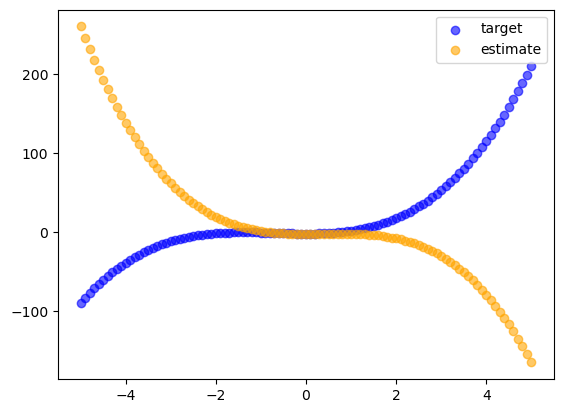

In [9]:
target_0 = polynomial(common_x_axis, target_coeffs)
estimate_0 = polynomial(common_x_axis, estimate_coeffs)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(common_x_axis, target_0, color='blue', alpha=0.6, label='target')
ax.scatter(common_x_axis, estimate_0, color='orange', alpha=0.6, label='estimate')
ax.legend()

As a reminder, here are the target coefficients and the initial estimate coefficients:

In [10]:
print(f'Target coefficients {target_coeffs}')
print(f'Initial estimate coefficients {estimate_coeffs}')
print(f'Initial RSS {rss(common_x_axis, target_coeffs, estimate_coeffs)}')

Target coefficients [-2.0, 0.0, 2.5, 1.2]
Initial estimate coefficients [-2.5, 0.0, 2.0, -1.7]
Initial RSS 2015004.0007105004


### Fit the Estimate Coefficients

In [11]:
gradient_descent_history = gradient_descent(common_x_axis, target_0, target_coeffs, estimate_coeffs)

### Plot the RSS History

As gradient descent fits the estimate coefficients, the RSS should drop with each iteration.

Text(0.5, 0, 'iteration')

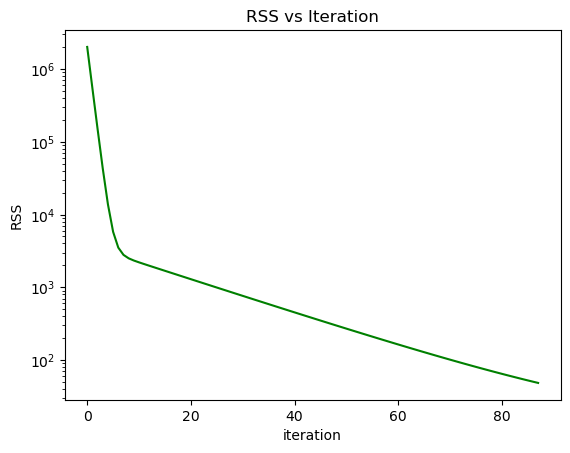

In [12]:
rss_history = [step['rss'] for step in gradient_descent_history]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_yscale('log')
ax.plot(list(range(len(rss_history))), rss_history, color='green')
ax.set_title(f'RSS vs Iteration')
ax.set_ylabel('RSS')
ax.set_xlabel('iteration')

### Plot the Final Estimate and Target Polynomials

This is a graphical representation of how close the fit is after training.

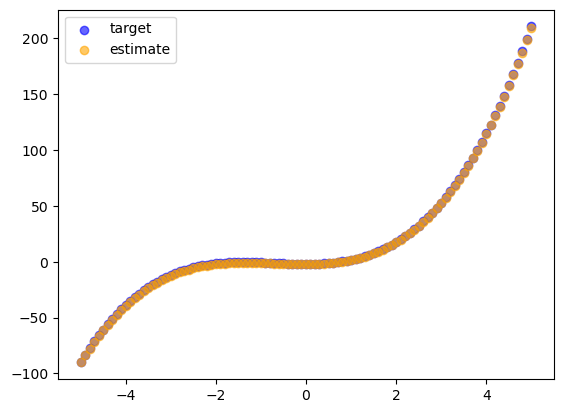

In [13]:
estimate_final = polynomial(common_x_axis, gradient_descent_history[-1]['y_hat_coeffs'])
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(common_x_axis, target_0, color='blue', alpha=0.6, label='target')
ax.scatter(common_x_axis, estimate_final, color='orange', alpha=0.6, label='estimate')
ax.legend()

### Report the Final Numbers

These are the numeric results of the training.

In [14]:
final_estimate_coeffs = gradient_descent_history[-1]['y_hat_coeffs']
initial_rss = gradient_descent_history[0]['rss']
print(f'Training iterations {len(gradient_descent_history)}')
print(f'Target coefficients {target_coeffs}')
print(f'Final estimate coefficients {final_estimate_coeffs}')
print(f'Initial RSS {initial_rss}')
print(f'Final RSS {rss(common_x_axis, target_coeffs, final_estimate_coeffs)}')

Training iterations 88
Target coefficients [-2.0, 0.0, 2.5, 1.2]
Final estimate coefficients [-2.4649992311439837, 0.1551299749689758, 2.4784435198598582, 1.1914759552905416]
Initial RSS 2015004.0007105004
Final RSS 48.45559484188128


## Acknowledgements

This algorithm is based on the description from Section 3 of the [*Computational Physics*](https://www.sciencecourseonline.com) course from Börge Göbel and from Eqn 3.16 in *An Intorduction to Statistical Learning with Applications in R* by Gareth James et al.